# Import Libraries

In [1]:
# to manipulate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split data into train and test
from sklearn.model_selection import train_test_split

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# to create extreme gradient boosting
from xgboost import XGBClassifier


# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune models
from sklearn.model_selection import GridSearchCV


#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import Dataset

In [2]:
visa = pd.read_csv(r"C:\Users\preet\OneDrive\Desktop\us_visa_mlops\us_visa\EasyVisa.csv")

In [3]:
data = visa.copy()

# Exploring the Data

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
data.shape

(25480, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [12]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The dataset has 25480 rows and 12 columns 
- There are no missing values in the dataset
- There are no duplicate values in the dataset
- `no_of_employees`, ` yr_of_estab`, and `prevailing_wage` are numeric features while rest are objects
- the no of employees has a mean of 5,667 and median of 2,109. This indicates that the distribution is skewed
- there are negative values in the no of employees which could be an error
- yr of estab ranges from 1800 to 2016
- prevailing wage ranges from 2 to 319,210 and distribution is skewed
- The most popular continent is Asia
- The most popular educational level is Bachelor

-------------------------------------------------------------------------------------------------

### 1 Investigate the negative values in the number of employees

In [13]:
# Understand how many cases we have
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

- since there cannot be that the number of employees in a company is negative, we will consider it as a data entry error
- we have 33 cases like this
- we will take the absolute value of those values

In [14]:
# convert the negative values to their absolute values
data['no_of_employees'] = abs(data['no_of_employees'])

### 2 Visualizing the unique values in each categorical column to see if there are any strange values

In [15]:
# categorial columns
obj_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in obj_col:
    print(data[column].value_counts(True))
    print("-" * 50)

case_id
EZYV01       0.000039
EZYV16995    0.000039
EZYV16993    0.000039
EZYV16992    0.000039
EZYV16991    0.000039
               ...   
EZYV8492     0.000039
EZYV8491     0.000039
EZYV8490     0.000039
EZYV8489     0.000039
EZYV25480    0.000039
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, 

- case id can be removed as it is not needed
- 66% of the applications are from Asians 
- 40% of the applicants have a bachelor's degree
- 58% of the applicants have job experience 
- 88% of the applicants do not require job training
- 28% of the applicants have their worksite in the Northeast region of the US
- 90% of the applicants have a yearly unit of wage
- 89% of the visa applications are having a full-time job positions
- 66% of the case status  are certified
- The target variable is imbalanced 

In [16]:
data.drop(["case_id"], axis=1, inplace=True)

# Exploratory Data Analysis

## Univariate Analysis

In [28]:
# for numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

In [29]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### 1 Observations on number of employees

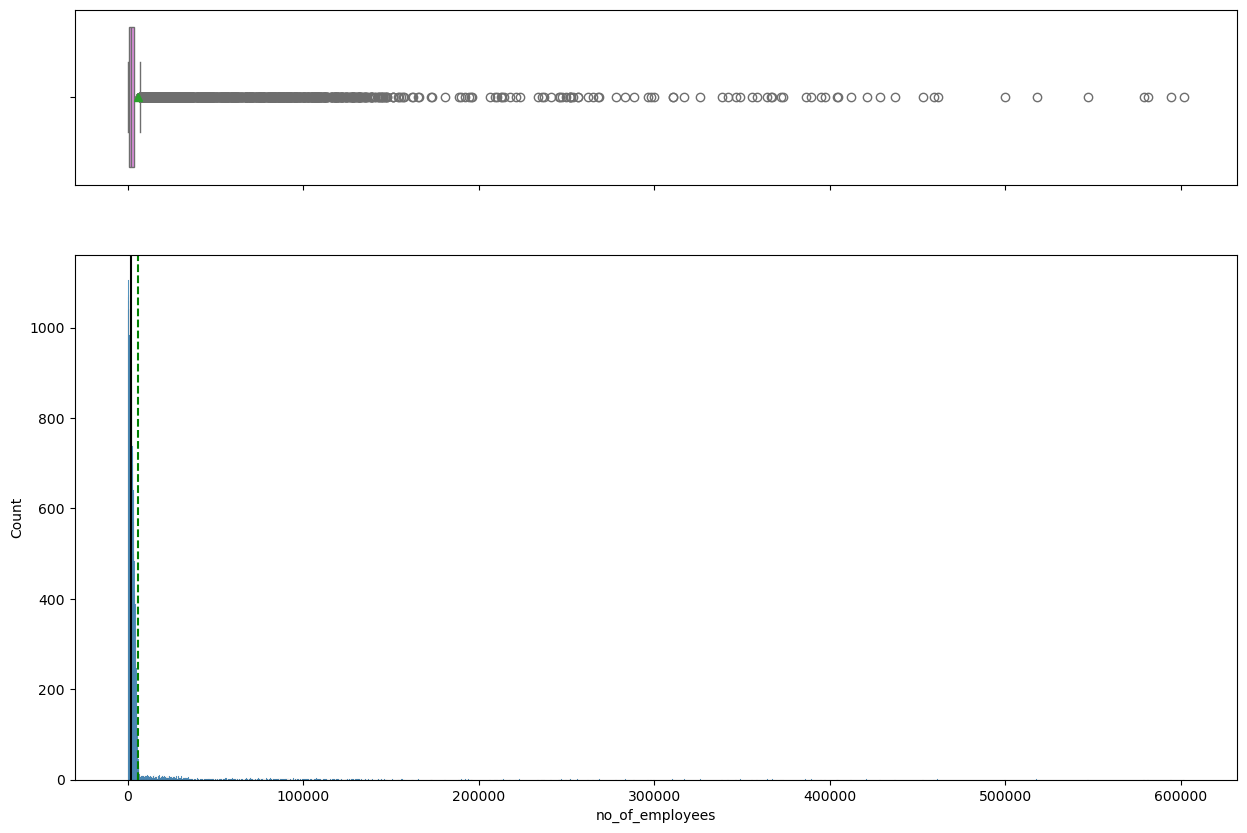

In [30]:
histogram_boxplot(data,'no_of_employees')

- the distribution of the number of employees is extremly skewed to the right
- It can be implied that the dataset has small companies, medium companies, and large international companies

### 2 Observations on prevailing wage

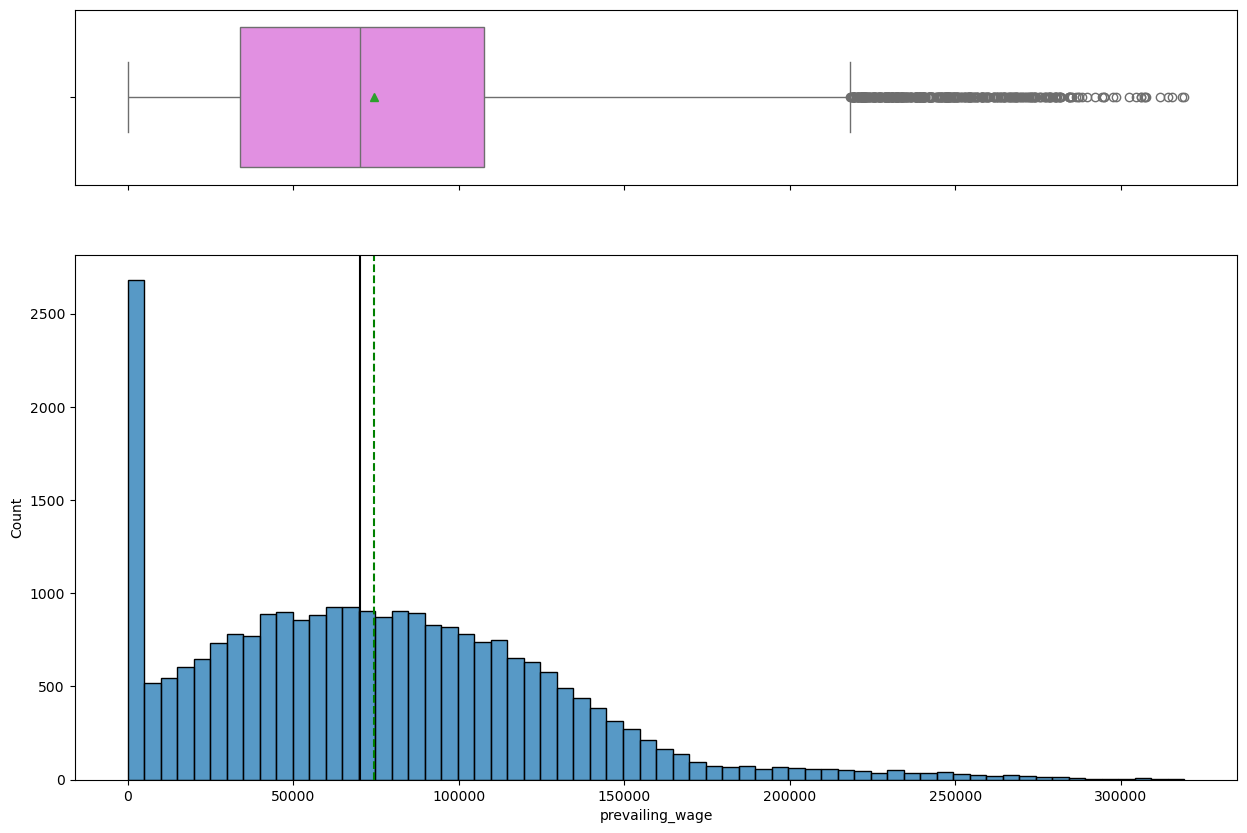

In [31]:
histogram_boxplot(data,'prevailing_wage')

- the distribution of the prevailing wage is skewed to the right
- there is a huge difference between wages among applicants
- there are applicants whose wage is more than 150,000
- there are applicants whose wage is around 0 and there are alot of them, we might need to check this
- it could be that some wages are entered as hourly base while others as yearly base

In [32]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

unit_of_wage
Hour    176
Name: count, dtype: int64

- it looks like the small wages are actually hourly based

### 3 Observations on continent

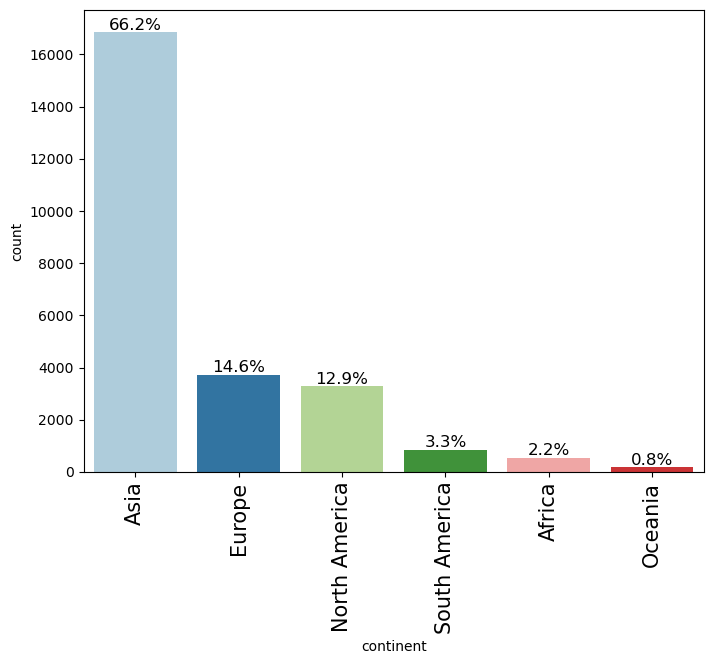

In [33]:
labeled_barplot(data, "continent", perc=True)

- 66% are coming from Asia, 15% are coming from EU, and 13% are coming from North Amercia

### 4 Observations on education of employee

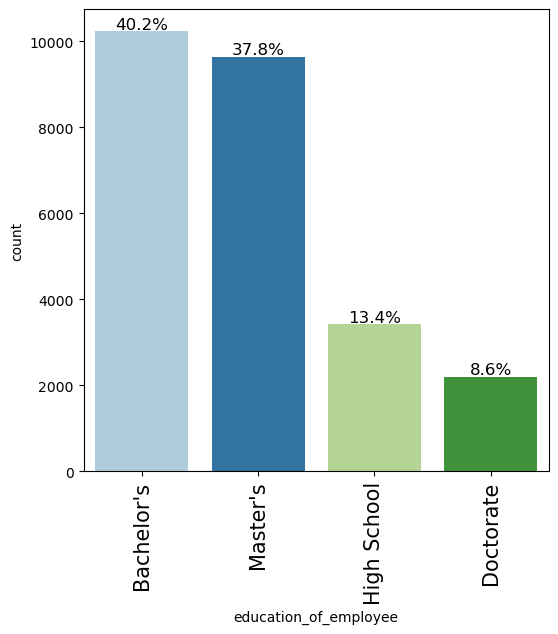

In [34]:
labeled_barplot(data, "education_of_employee", perc=True)

* 40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.
* 8.6% of the applicants have a doctorate degree.

### 5 Observations on job experience

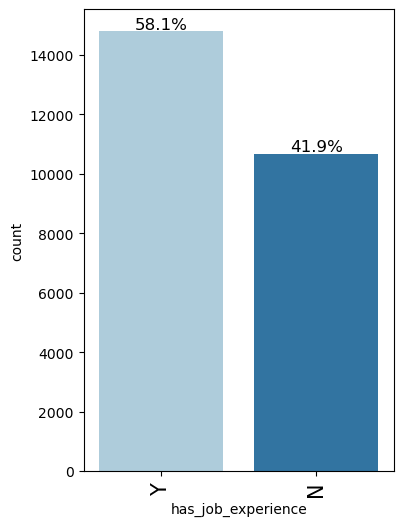

In [35]:
labeled_barplot(data, "has_job_experience", perc=True)

- 58.1% of the applicants have job experience

### 6 Observations on job training

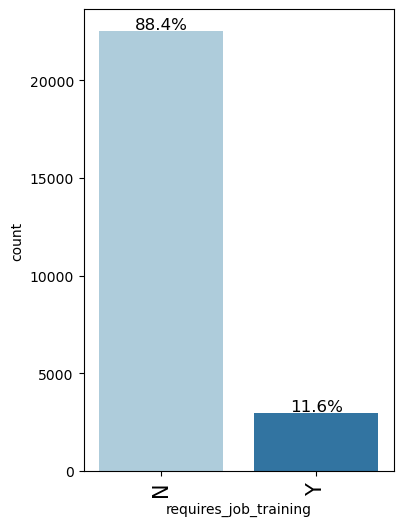

In [36]:
labeled_barplot(data, "requires_job_training", perc=True)

- 88.4% of the applicants do not require any job training

### 7 Observations on region of employment

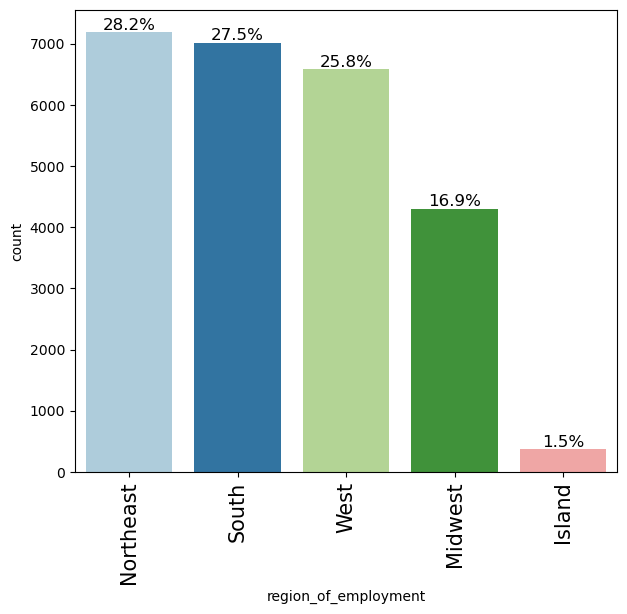

In [37]:
labeled_barplot(data, "region_of_employment", perc=True)

- Northeast, South, and West are equally distributed
- The Island regions have only 1.5% of the applicants

### 8 Observations on unit of wage

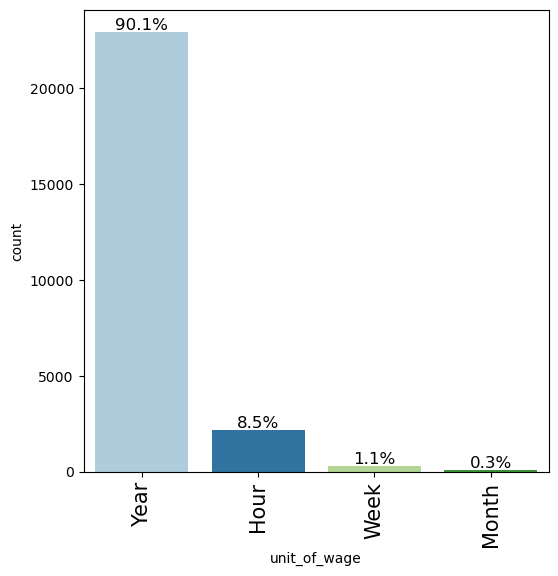

In [38]:
labeled_barplot(data, "unit_of_wage", perc=True)

- 90.1% of the applicants have a yearly unit of the wage

### 9 Observations on case status

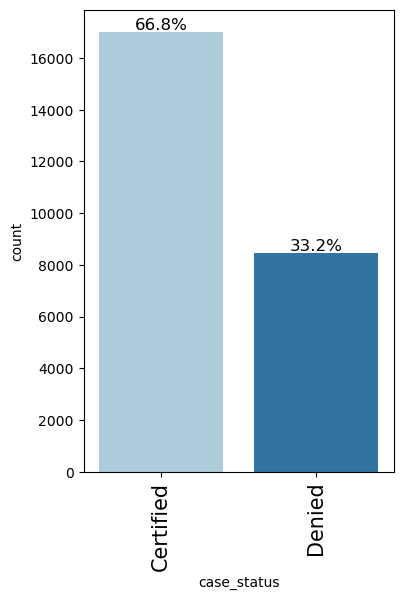

In [39]:
labeled_barplot(data, "case_status", perc=True)

* 66.8% of the visas were certified.

## Bivariate Analysis

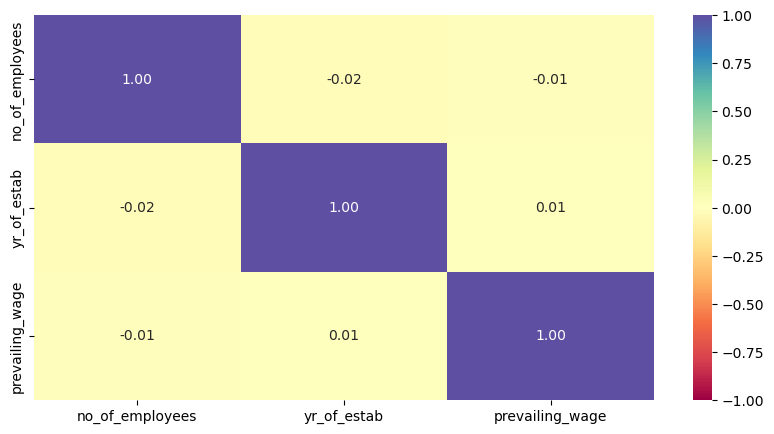

In [40]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- we cannot see any correlation between the numerical variables

In [41]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [42]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### 1 Education vs case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


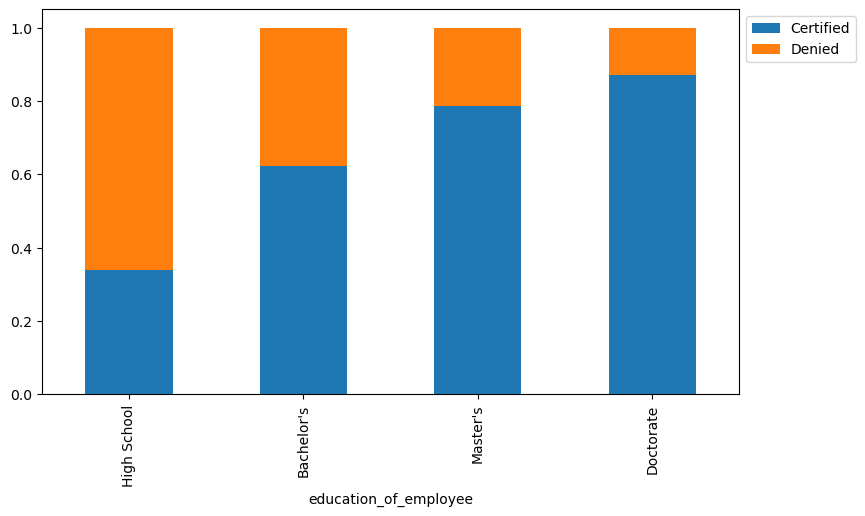

In [43]:
stacked_barplot(data, "education_of_employee", "case_status")

- The higher the education, the more chance to get certified

### 2 education vs region

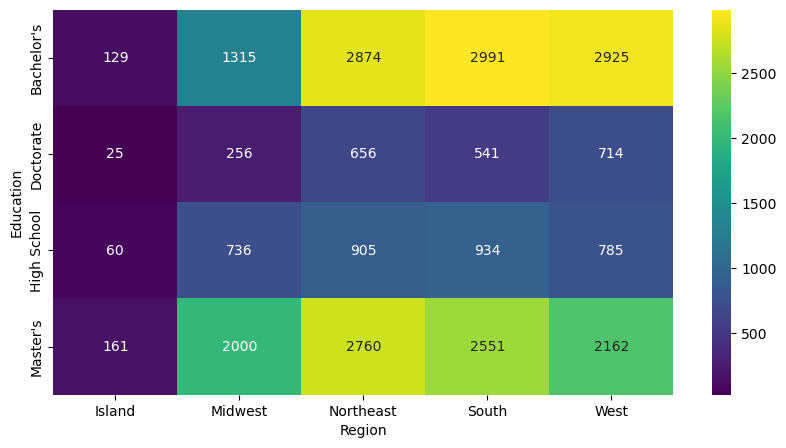

In [44]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
* The requirement for Bachelor's is mostly in South region, followed by West region.
* The requirement for Master's is most in Northeast region, followed by South region.
* The requirement for Doctorate's is mostly in West region, followed by Northeast region.

### 3 region vs case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


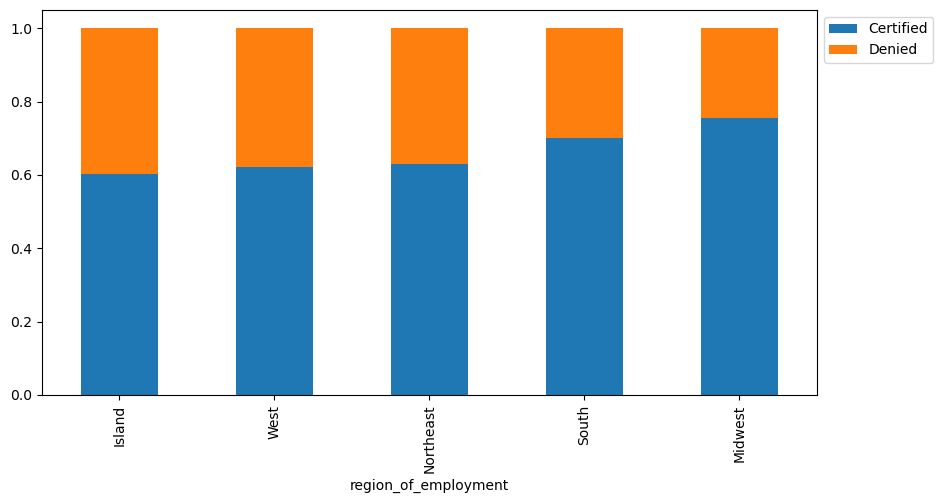

In [45]:
stacked_barplot(data, "region_of_employment", "case_status")

- Midwest has the highest positive case chance
- Island, in the opposite side, has the lowestpositive case chance

### 4 continent vs case status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


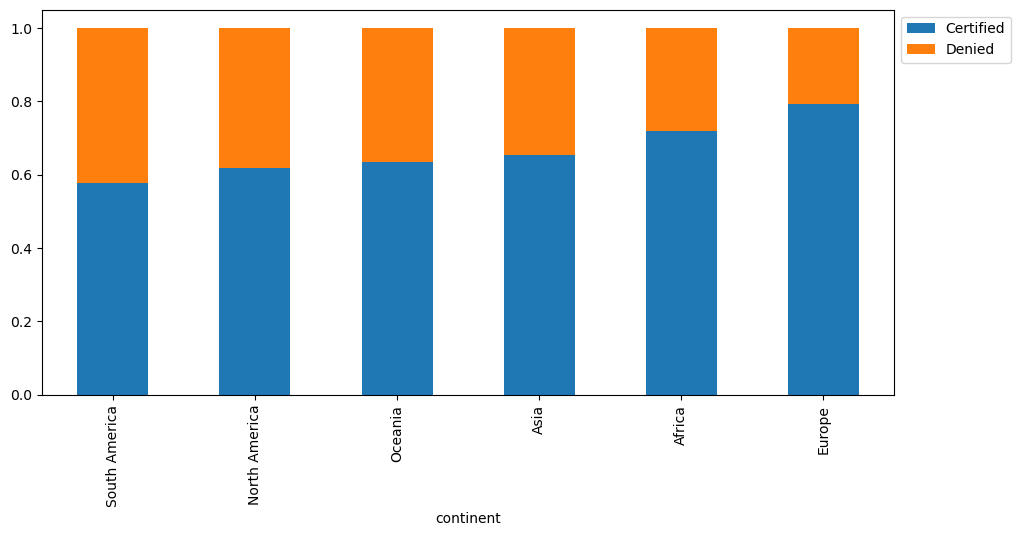

In [46]:
stacked_barplot(data, "continent", "case_status")

- EU has the highest chance of getting certified, while South America has the loest chance

### 5 job experience vs case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


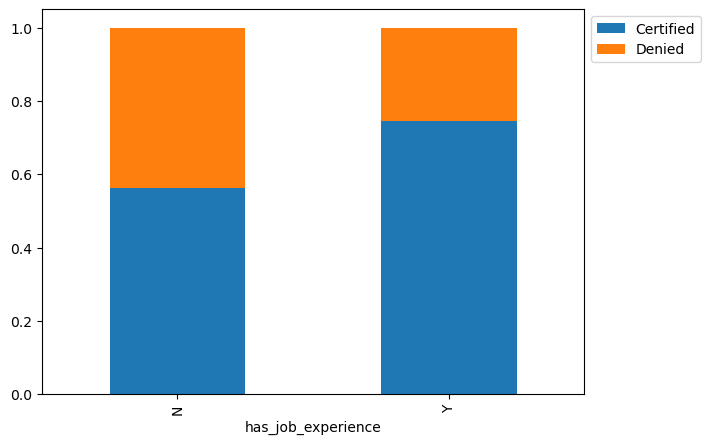

In [47]:
stacked_barplot(data, "has_job_experience", "case_status")

- applicants with job experience have more chances of getting certified

### 6 job experience vs training required

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


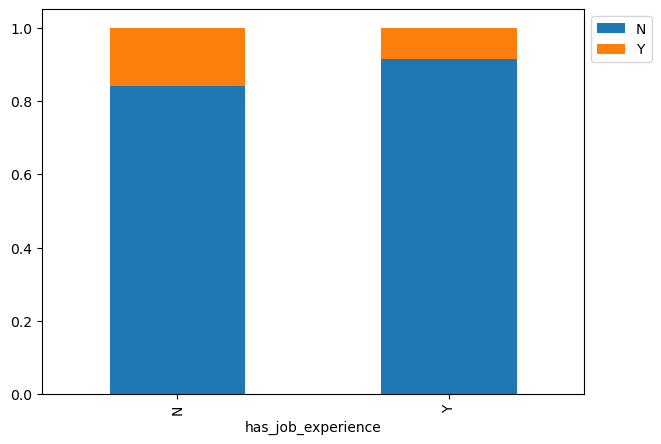

In [48]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

- if the applicant has a job experience, they are less likely to require training

### 7 wage vs case status

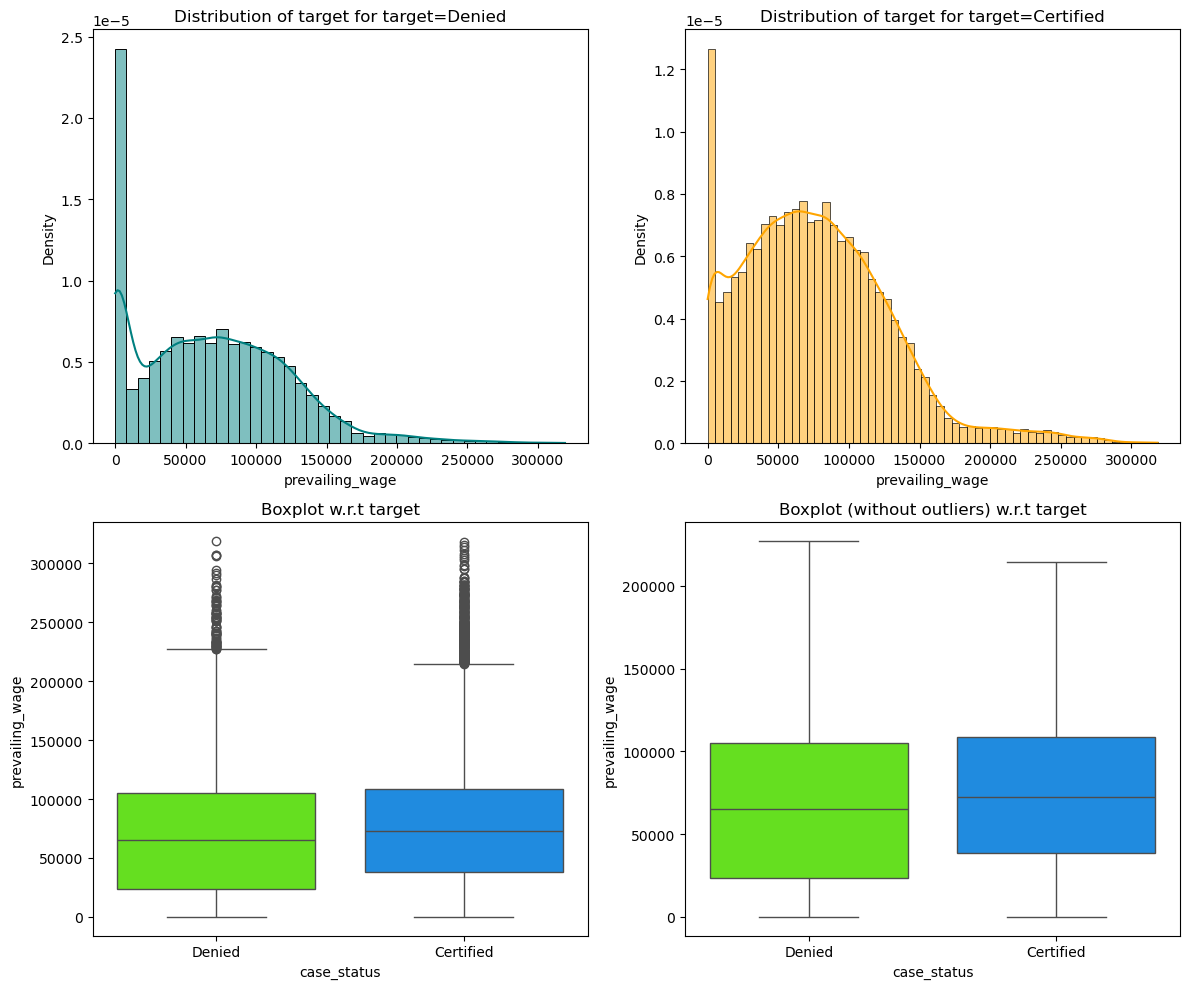

In [49]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* The median prevailing wage for the certified applications is slightly higher as compared to denied applications.

### 8 region vs wage

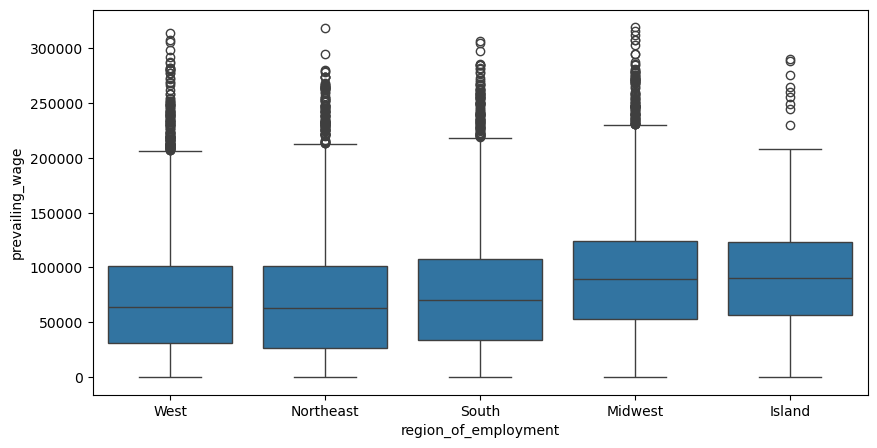

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

- prevailing wages is higher in Midwest and Island

### 9 unit of wage vs case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


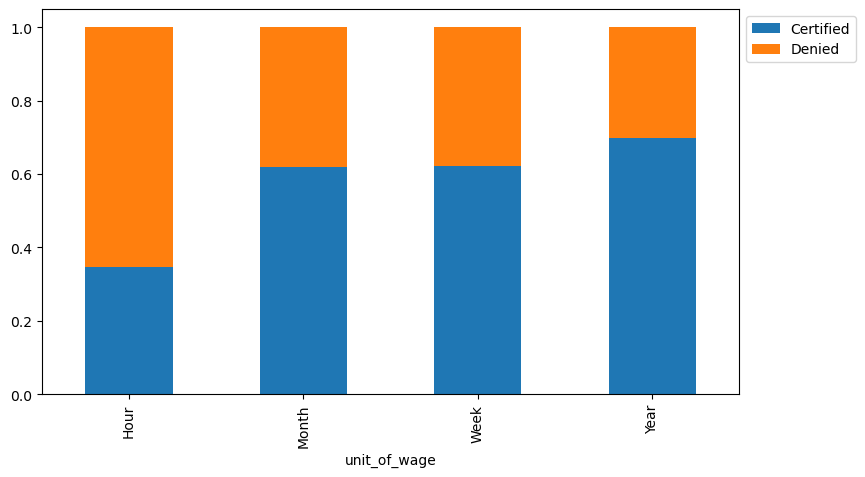

In [51]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Hourly waged applicants are more likely to get denied while yearly are more likley to get certified

# Data Pre-processing

### Outlier Check

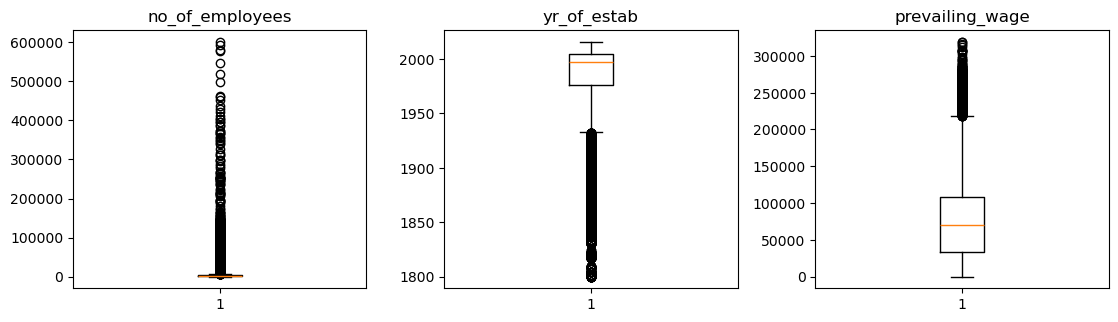

In [52]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Although there are outliers, we will keep them as they have a valuable input

# Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [53]:
# encode case status, where certified is 1, denied is 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [54]:
# split to train and test
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

# create dummy varialbes for categories
X = pd.get_dummies(X, drop_first=True)

In [55]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [56]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


# Model evaluation criterion

In [87]:
def evaluate_classifier(
    model, X_train, y_train, X_test, y_test, plot_cm=True
):
    def _metrics(y_true, y_pred):
        return {
            "Accuracy": accuracy_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "F1": f1_score(y_true, y_pred),
        }

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = pd.DataFrame(
        [
            _metrics(y_train, y_train_pred),
            _metrics(y_test, y_test_pred),
        ],
        index=["Train", "Test"],
    )

    if plot_cm:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        for ax, y_true, y_pred, title in zip(
            axes,
            [y_train, y_test],
            [y_train_pred, y_test_pred],
            ["Train", "Test"],
        ):
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt="d", ax=ax)
            ax.set_title(f"{title} Confusion Matrix")
            ax.set_xlabel("Predicted")
            ax.set_ylabel("Actual")

        plt.tight_layout()
        plt.show()

    return results


In [88]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Bagging": BaggingClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "XGBoost": XGBClassifier(
        eval_metric="logloss", use_label_encoder=False, random_state=1
    ),
}

all_results = {}

for name, model in models.items():
    all_results[name] = evaluate_classifier(
        model, X_train, y_train, X_test, y_test, plot_cm=False
    )

final_results = pd.concat(all_results, axis=0)
final_results


Accuracy  Precision    Recall        F1
Decision Tree     Train  1.000000   1.000000  1.000000  1.000000
                  Test   0.664835   0.752232  0.742801  0.747487
Bagging           Train  0.985198   0.991810  0.985982  0.988887
                  Test   0.691523   0.771711  0.764153  0.767913
Random Forest     Train  0.999944   1.000000  0.999916  0.999958
                  Test   0.720827   0.768869  0.832125  0.799247
AdaBoost          Train  0.738226   0.760688  0.887182  0.819080
                  Test   0.734301   0.757799  0.885015  0.816481
Gradient Boosting Train  0.758802   0.783042  0.883740  0.830349
                  Test   0.744767   0.772366  0.876004  0.820927
XGBoost           Train  0.841444   0.847578  0.929825  0.886798
                  Test   0.732077   0.770005  0.853869  0.809772

In [89]:
model_param_grid = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(
            class_weight="balanced", random_state=1
        ),
        "params": {
            "max_depth": [10, 15, 20],
            "min_samples_leaf": [3, 5, 7],
        },
    },

    "Bagging": {
        "model": BaggingClassifier(random_state=1),
        "params": {
            "n_estimators": [50, 100],
            "max_samples": [0.7, 1.0],
        },
    },

    "Random Forest": {
        "model": RandomForestClassifier(
            class_weight="balanced", random_state=1
        ),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20],
            "min_samples_leaf": [3, 5],
        },
    },

    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=1),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 1.0],
        },
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=1),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5],
        },
    },

    "XGBoost": {
        "model": XGBClassifier(
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=1,
        ),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5],
        },
    },
}


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd

best_models = {}
summary = []

for name, mp in model_param_grid.items():
    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        scoring="f1",
        cv=5,
        n_jobs=-1,
        verbose=0,
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    summary.append({
        "Model": name,
        "Best CV F1": grid.best_score_,
        "Best Params": grid.best_params_,
    })


In [91]:
final_results = {}

for name, model in best_models.items():
    final_results[name] = evaluate_classifier(
        model, X_train, y_train, X_test, y_test, plot_cm=False
    )


In [92]:
cv_results_df = pd.DataFrame(summary).sort_values(
    by="Best CV F1", ascending=False
)

test_results_df = pd.concat(final_results, axis=0)

cv_results_df, test_results_df


(               Model  Best CV F1  \
 5            XGBoost    0.825320   
 4  Gradient Boosting    0.824743   
 3           AdaBoost    0.817840   
 1            Bagging    0.808112   
 2      Random Forest    0.799101   
 0      Decision Tree    0.769327   
 
                                          Best Params  
 5  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...  
 4  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
 3        {'learning_rate': 0.1, 'n_estimators': 100}  
 1          {'max_samples': 0.7, 'n_estimators': 100}  
 2  {'max_depth': 20, 'min_samples_leaf': 3, 'n_es...  
 0           {'max_depth': 10, 'min_samples_leaf': 7}  ,
                          Accuracy  Precision    Recall        F1
 Decision Tree     Train  0.746187   0.841628  0.763704  0.800775
                   Test   0.699372   0.801893  0.730264  0.764404
 Bagging           Train  0.993608   0.991748  0.998741  0.995232
                   Test   0.727499   0.770692  0.842703  0.805090
 Random Forest  

- Tuned XGBoost model is performing very well
- We will use tuned XGBoost as the final model


In [93]:
tuned_xgboost = best_models["XGBoost"]
tuned_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [94]:
importances = tuned_xgboost.feature_importances_

feature_importance_df = (
    pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": importances
    })
    .sort_values(by="Importance", ascending=False)
)

feature_importance_df.head(10)


,Feature,Importance
9,education_of_employee_High School,0.231935
8,education_of_employee_Doctorate,0.126310
19,unit_of_wage_Year,0.114848
10,education_of_employee_Master's,0.094870
11,has_job_experience_Y,0.093817
4,continent_Europe,0.072654
2,prevailing_wage,0.065881
15,region_of_employment_South,0.046622
13,region_of_employment_Midwest,0.041105
16,region_of_employment_West,0.019856


### Important features of the final model

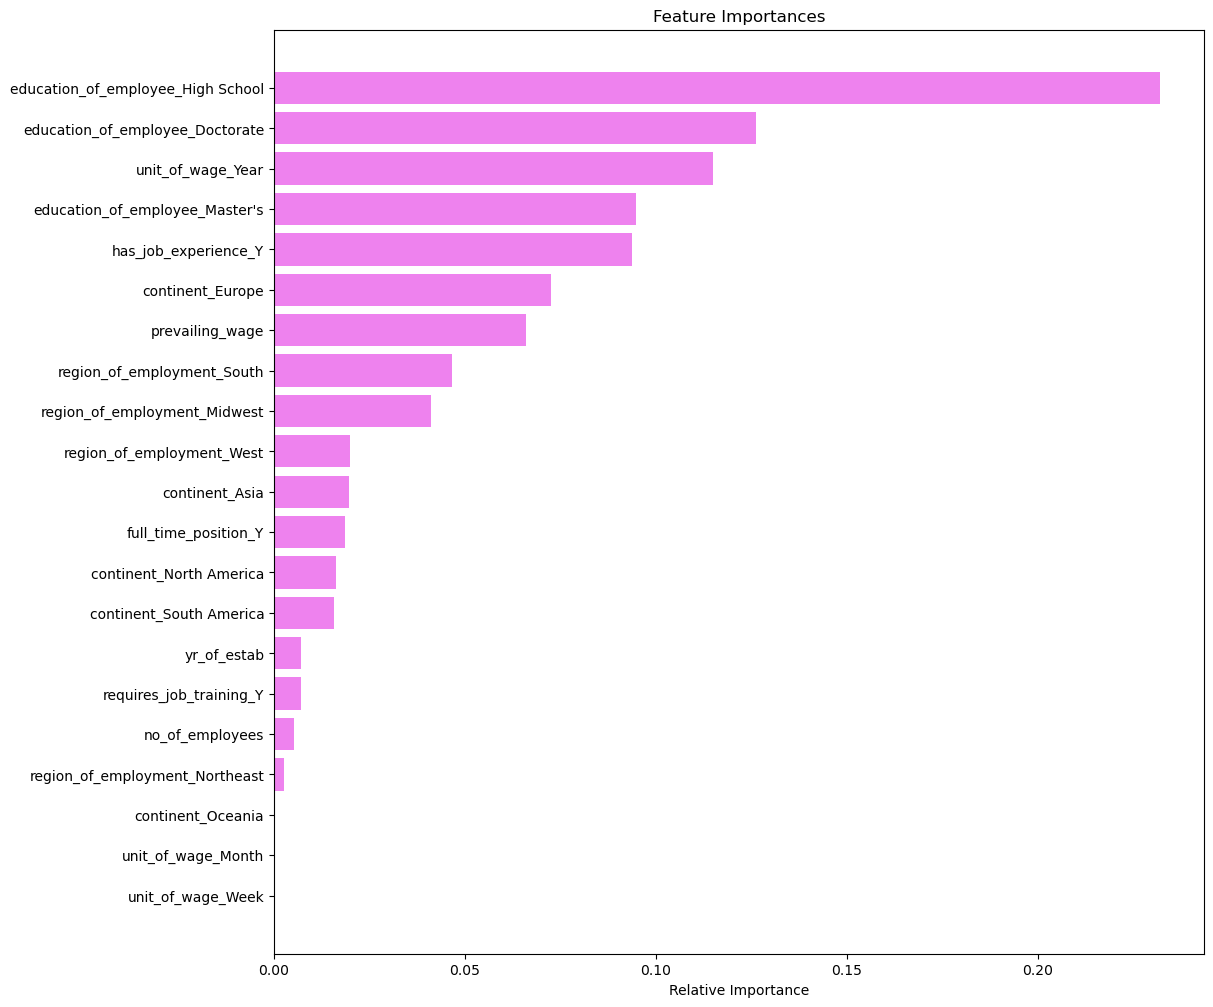

In [95]:
feature_names = X_train.columns
importances = tuned_xgboost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Insights 

The tuned XGBoost model identifies **education, wage structure, job experience, and geography** as the key drivers of visa approval.

- **Education level** is the most influential factor. Applicants with **Master’s and Doctorate degrees** have a significantly higher likelihood of approval, while **high-school-only education** is strongly associated with denial
- **Wage characteristics** matter: a **yearly wage unit** and **higher prevailing wages** are positively linked to visa approval.
- **Job experience** substantially improves approval probability; applicants without prior experience are less likely to be approved.
- **Geographic factors** show moderate influence: applications from **Europe and Asia** and roles located in the **South and Midwest regions** have higher approval likelihood.
- **Employment attributes** such as **full-time positions** contribute positively, while company size and job training requirements have minimal impact.
